
# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

   ‘ScheduledDay’ tells us on what day the patient set up their appointment.
   ‘Neighborhood’ indicates the location of the hospital.
   ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(opens in a new tab).
    Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

Does gender influence the chances of a "No_ Show" appointment?

Is there a corelation client scholarships and no show appointments?

Is there a corelation between receiving a sms text and no show appointments?

In [2]:
import pandas as pd
import numpy as np

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Checking if there is any null values in any of the columns
df.info()
# We know that there are not any nulls in the dataframe 
# because in each column there is a max of 110527 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Checking if the Data is valid

example: Making sure that there are only 2 unique values for scholarships (yes and no)

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df['Handcap'].unique()

# According to noshow dataset on kaggle, the handcap is either true or false 
# So there should only be 2 unique output for this column
# We will later drop the rows with handcap values being 2 3 or 4
# Handcap is also spelled wrong and should be Handicap, We will later rename this

array([0, 1, 2, 3, 4])

In [7]:
# Checking if there are any duplicated values within our dataframe
# If there is we will be dropping it later
sum(df.duplicated())

0

In [8]:
# Human age should not be extremely high or into the negatives, so we will be filtering out any ages that are outliers

print('Min: ',df['Age'].min())
print('Max: ',df['Age'].max())

Min:  -1
Max:  115


#### Column Naming Discrepency
The way that the column names are set up is not consistent, for example: No-show and AppointmentDay

In order to make it more consistent, I will be using the same naming template as SMS_Recieved.
so we will be renaming No-show and AppointmentDay to No_Show and Appointment_Day respectively.


## Data Cleaning
 

# Dropping Handcap and renaming Handcap column to Handicap


In [9]:
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
values = [2, 3, 4]
indexlist = []
for i in values: 
    indexlist.extend(df[df['Handicap'] == i].index)
df.iloc[indexlist].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No


In [11]:
# Dropping data with handicap values greater than 1
df.drop(index = indexlist, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110328 non-null  float64
 1   AppointmentID   110328 non-null  int64  
 2   Gender          110328 non-null  object 
 3   ScheduledDay    110328 non-null  object 
 4   AppointmentDay  110328 non-null  object 
 5   Age             110328 non-null  int64  
 6   Neighbourhood   110328 non-null  object 
 7   Scholarship     110328 non-null  int64  
 8   Hipertension    110328 non-null  int64  
 9   Diabetes        110328 non-null  int64  
 10  Alcoholism      110328 non-null  int64  
 11  Handicap        110328 non-null  int64  
 12  SMS_received    110328 non-null  int64  
 13  No-show         110328 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


# Dropping data with negative age

In [13]:
index_age = df[df['Age'] == -1].index
df.drop(index = index_age, inplace=True)

In [14]:
#Checking if the -1 y/o data is dropped
df['Age'].min()

0

In [15]:
# Renaming columns to fit the standard
df.rename(columns = {'PatientId':'Patient_ID', 'AppointmentID':'Appointment_ID', 'ScheduledDay': 'Schedule_Day', 'No-show':'No_Show', 'AppointmentDay': 'Appointment_Day'}, inplace = True)

In [16]:
# Checking to see if the columns are properly renamed
df.head()

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### Does gender influence the chances of a "No_ Show" appointment?

In [30]:
#First we have to figure out how many female and males we have in our dataset respectively

df['Gender'].value_counts()

F    71730
M    38597
Name: Gender, dtype: int64

In [17]:
gender = df.groupby('Gender')['No_Show'].value_counts()
gender

Gender  No_Show
F       No         57162
        Yes        14568
M       No         30887
        Yes         7710
Name: No_Show, dtype: int64

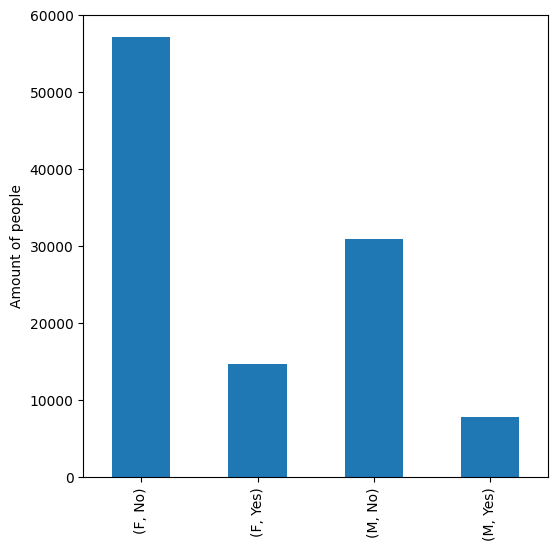

In [51]:
gender.plot(
    kind = 'bar',
    figsize=(6,6),
    xlabel= '',
    ylabel= 'Amount of people');

#### Now let's find the porpotion of how many male vs female do not show up to appointments

In [74]:
#First lets filter out the gender data for only females

fgender = gender.drop('M').drop('No', level= 'No_Show')
fgender

Gender  No_Show
F       Yes        14568
Name: No_Show, dtype: int64

In [162]:
# Next lets filter the gender data for only males

mgender = gender.drop('F').drop('No', level= 'No_Show')
mgender

Gender  No_Show
M       Yes        7710
Name: No_Show, dtype: int64

In [151]:
# Now that the data is more clear we can find the percentage of no shows for gender by doing 
# no show male / total male = percentage of male that did not show
# we can then later to the same for female as well

mpercentage = mgender / df['Gender'].value_counts()['M']
fpercentage = fgender / df['Gender'].value_counts() ['F']

print(mpercentage[0])
fpercentage[0]

0.19975645775578413


0.20309493935591802

In [130]:
gender_percentage = pd.DataFrame(
    {"Percentage": [mpercentage[0], fpercentage[0]]},
    index=["Male", "Female"])

gender_percentage

,Percentage
Male,0.199756
Female,0.203095


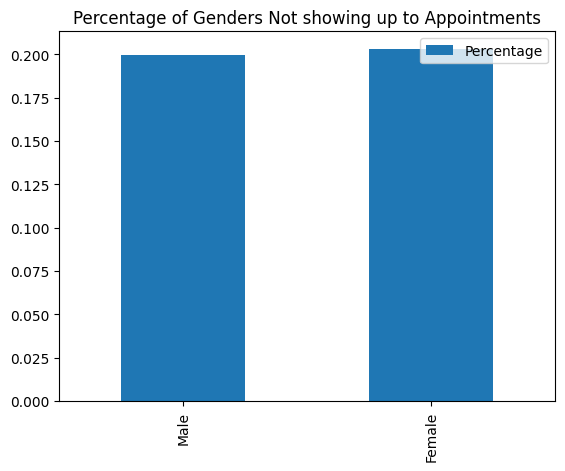

In [135]:
gender_percentage.plot(kind= 'bar',
                      title = 'Percentage of Genders Not showing up to Appointments');

## Conclusion: It does not seem like there is a significant difference within gender not showing up to appointments

The difference between female and males not showing up in percentage is less than 0.01 which is not significant at all!

### Is there a corelation client scholarships and no show appointments?

In [20]:
# First off let's find out how many people are enrolled in the welfare program compared to those who are not!

df['Scholarship'].value_counts()

0    99484
1    10843
Name: Scholarship, dtype: int64

In [138]:
# Now let's see figure out how many people are part of welfare that show up and do not show up to appointments
# compared to people who dont have welfare
welfare = df.groupby('Scholarship')['No_Show'].value_counts()
welfare

Scholarship  No_Show
0            No         79783
             Yes        19701
1            No          8266
             Yes         2577
Name: No_Show, dtype: int64

In [164]:
# Now lets find the percentage of no shows associated with the welfare program

welfare_yes = welfare.drop(0).drop('No', level= 'No_Show')
welfare_no = welfare.drop(1).drop('No', level= 'No_Show')

print(welfare_yes)
welfare_no

Scholarship  No_Show
1            Yes        2577
Name: No_Show, dtype: int64


Scholarship  No_Show
0            Yes        19701
Name: No_Show, dtype: int64

In [185]:
welfare_percentage_yes = welfare_yes / df['Scholarship'].value_counts()[1]
welfare_percentage_yes.iloc[0]

0.2376648529004888

In [186]:
welfare_percentage_no = welfare_no / df['Scholarship'].value_counts()[0]
welfare_percentage_no.iloc[0]

0.19803184431667403

In [189]:
welfare_percentage = pd.DataFrame({
    'Percentage': [welfare_percentage_yes.iloc[0], welfare_percentage_no.iloc[0]]},
    index = ['Has Welfare', 'No Welfare'])

welfare_percentage

,Percentage
Has Welfare,0.237665
No Welfare,0.198032


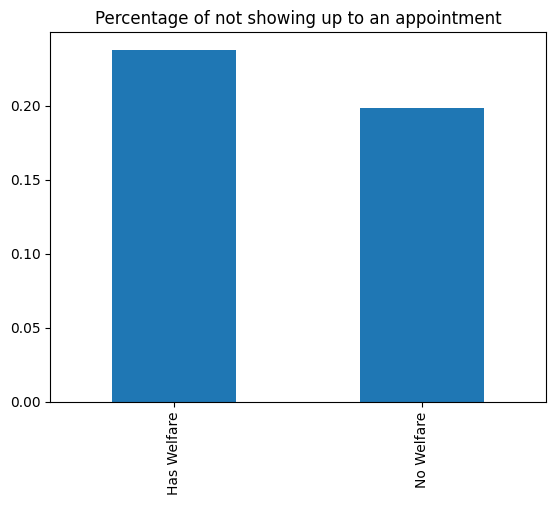

In [221]:
welfare_percentage.plot(kind= 'bar',
                       title= 'Percentage of not showing up to an appointment',
                       legend= False);

## Conclusion: People who have welfare are more likely to not show up to appointments by ~4%

### Is there a corelation between receiving a sms text and no show appointments?


In [210]:
# First off lets find the amount of people who have received a text compared to people who have not received a text
sms = df.groupby('SMS_received')['No_Show'].value_counts()
print(sms)
df['SMS_received'].value_counts()[1]

SMS_received  No_Show
0             No         62389
              Yes        12503
1             No         25660
              Yes         9775
Name: No_Show, dtype: int64


35435

In [202]:
# Filtering out the SMS received no shows

no_show_sms = sms.drop(0).drop('No', level= 'No_Show')
no_show_sms

SMS_received  No_Show
1             Yes        9775
Name: No_Show, dtype: int64

In [206]:
# Filtering out the no SMS no shows

no_show_no_sms = sms.drop(1).drop('No', level= 'No_Show')
no_show_no_sms

SMS_received  No_Show
0             Yes        12503
Name: No_Show, dtype: int64

In [213]:
# Now let's find out the percentage of no show for both parties who received sms and who did not receive sms texts

sms_percentage = no_show_sms.iloc[0] / df['SMS_received'].value_counts()[1]
nosms_percentage = no_show_no_sms.iloc[0] / df['SMS_received'].value_counts()[0]

print(sms_percentage)
nosms_percentage

0.27585720333004093


0.16694707044811194

In [217]:
# Making a dataframe out of these numbers! 

sms_noshow_percentage = pd.DataFrame(
    {'Percentage': [sms_percentage, nosms_percentage]},
    index= ["SMS Sent", "No SMS"]
)

,Percentage
SMS Sent,0.275857
No SMS,0.166947


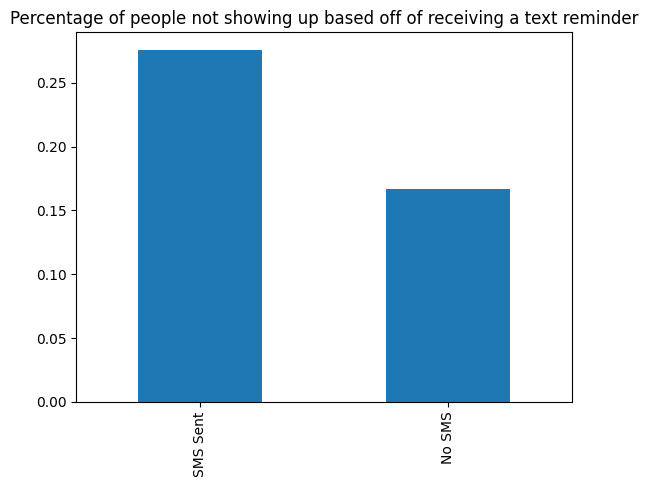

In [220]:
#Plotting

sms_noshow_percentage.plot(kind= 'bar',
                          title= 'Percentage of people not showing up based off of receiving a text reminder',
                          legend= False);

## Conclusion: People who have received an SMS text reminder have a higher chance of not showing up to the appointments!

<a id='conclusions'></a>
## Conclusions

#1 
> The difference between female and males not showing up to appointments is less than .01%

#2

> People who have welfare are more likely to not show up to appointments by ~4%

#3

> People who have received an SMS text reminder have a higher chance of not showing up to the appointments!       
Notes: I was really not expecting to find this conclusion, I believe that this could be an outlier compared to other datasets



In [1]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 454451 bytes to Investigate_a_Dataset.html
